In [151]:
#mysql에서 데이터 가져오기
import pymysql
#데이터베이스에 연결
import pymysql
conn= pymysql.connect(host='127.0.0.1', user='root', password='1234',
                     db='CORONA_test')

cur=conn.cursor()

In [152]:
cur.execute("SELECT * FROM corona_test.corona_test1;")
#fetch_all 사용해서 select 한거를 완전하게 불러와야 함
fetched1=cur.fetchall()

In [153]:
fetched1

(('2021-08-19', 1999, 51, 2050),
 ('2021-08-20', 1811, 66, 1877),
 ('2021-08-21', 1588, 38, 1626),
 ('2021-08-22', 1369, 48, 1417),
 ('2021-08-23', 1468, 39, 1507),
 ('2021-08-24', 2113, 41, 2154),
 ('2021-08-25', 1829, 53, 1882))

In [154]:
cur.execute("SELECT * FROM corona_test.corona_test2;")
#fetch_all 사용해서 select 한거를 완전하게 불러와야 함
fetched2=cur.fetchall()

In [239]:
fetched2

(('제주', '2,494'),
 ('서울', '76,245'),
 ('인천', '11,305'),
 ('광주', '3,920'),
 ('광주', '3,920'),
 ('경북', '6,802'),
 ('부산', '10,999'),
 ('대구', '13,192'),
 ('강원', '5,242'),
 ('경기', '68,158'),
 ('전남', '2,479'),
 ('충북', '4,953'),
 ('충남', '6,547'),
 ('충남', '6,547'),
 ('대전', '5,413'),
 ('세종', '944'),
 ('전북', '3,396'),
 ('경남', '9,615'),
 ('울산', '3,997'))

In [156]:
#데이터를 모두 불렀으니 연결해제
conn.close()

In [157]:
fetched1

(('2021-08-19', 1999, 51, 2050),
 ('2021-08-20', 1811, 66, 1877),
 ('2021-08-21', 1588, 38, 1626),
 ('2021-08-22', 1369, 48, 1417),
 ('2021-08-23', 1468, 39, 1507),
 ('2021-08-24', 2113, 41, 2154),
 ('2021-08-25', 1829, 53, 1882))

In [158]:
fetched2

(('제주', '2,494'),
 ('서울', '76,245'),
 ('인천', '11,305'),
 ('광주', '3,920'),
 ('광주', '3,920'),
 ('경북', '6,802'),
 ('부산', '10,999'),
 ('대구', '13,192'),
 ('강원', '5,242'),
 ('경기', '68,158'),
 ('전남', '2,479'),
 ('충북', '4,953'),
 ('충남', '6,547'),
 ('충남', '6,547'),
 ('대전', '5,413'),
 ('세종', '944'),
 ('전북', '3,396'),
 ('경남', '9,615'),
 ('울산', '3,997'))

In [159]:
# empty df
import pandas as pd
df1 = pd.DataFrame(columns=['일자', '국내발생', '해외유입', '신규_확진자_수'])
df1


,일자,국내발생,해외유입,신규_확진자_수


In [220]:
#list(fetched1[0])

('2021-08-19', 1999, 51, 2050)

In [161]:
df1.loc[0]= list(fetched1[0])
df1

,일자,국내발생,해외유입,신규_확진자_수
0,2021-08-19,1999,51,2050


In [162]:
for i in range(len(fetched1)):
    df1.loc[i] = list(fetched1[i])

In [240]:
print(type(df1))
df1

<class 'pandas.core.frame.DataFrame'>


,일자,국내발생,해외유입,신규_확진자_수
0,2021-08-19,1999,51,2050
1,2021-08-20,1811,66,1877
2,2021-08-21,1588,38,1626
3,2021-08-22,1369,48,1417
4,2021-08-23,1468,39,1507
5,2021-08-24,2113,41,2154
6,2021-08-25,1829,53,1882


### 여기까지

In [164]:
#2번째
df2 = pd.DataFrame(columns=['지역', '누적_인구'])
df2

,지역,누적_인구


In [165]:
for i in range(len(fetched2)):
    df2.loc[i] = list(fetched2[i])

In [166]:
df2

,지역,누적_인구
0,제주,"2,494"
1,서울,"76,245"
2,인천,"11,305"
3,광주,"3,920"
4,광주,"3,920"
5,경북,"6,802"
6,부산,"10,999"
7,대구,"13,192"
8,강원,"5,242"
9,경기,"68,158"


In [167]:
#시각화 하기
import pandas as pd
import matplotlib.pyplot as plt
#한글설정
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')

In [168]:
df1.columns

Index(['일자', '국내발생', '해외유입', '신규_확진자_수'], dtype='object')

In [169]:
df1['신규_확진자_수'][1]

1877

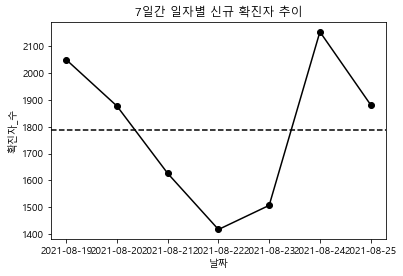

In [241]:
#일자별 선 그래프
#어제뽑은 데이터 기준
plt.plot(df1['일자'], df1['신규_확진자_수'], color='black', marker='o')
plt.title('7일간 일자별 신규 확진자 추이')
plt.axhline(y= df1['신규_확진자_수'].mean(), linestyle='--', color='black', label="평균")
plt.xlabel('날짜')
plt.ylabel('확진자_수')

plt.show()
#확진자 추이가 줄어들었다가 최근들어 다시 늘어나는 양상을 띔

# why
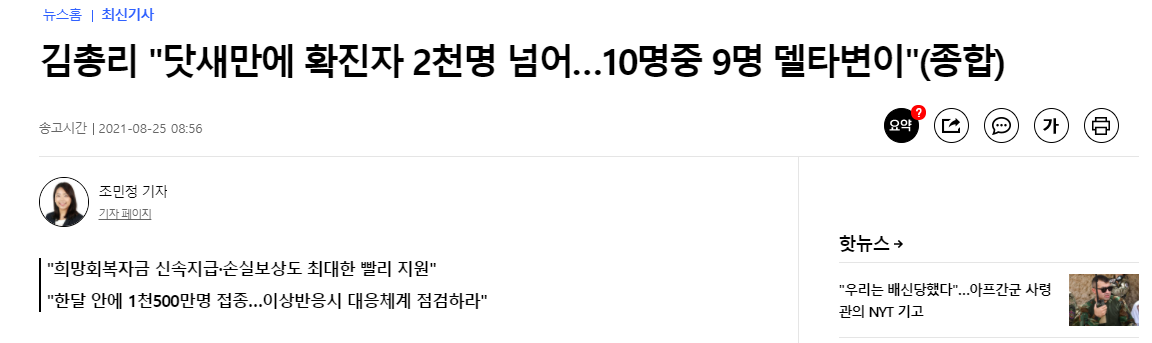

============================================================================
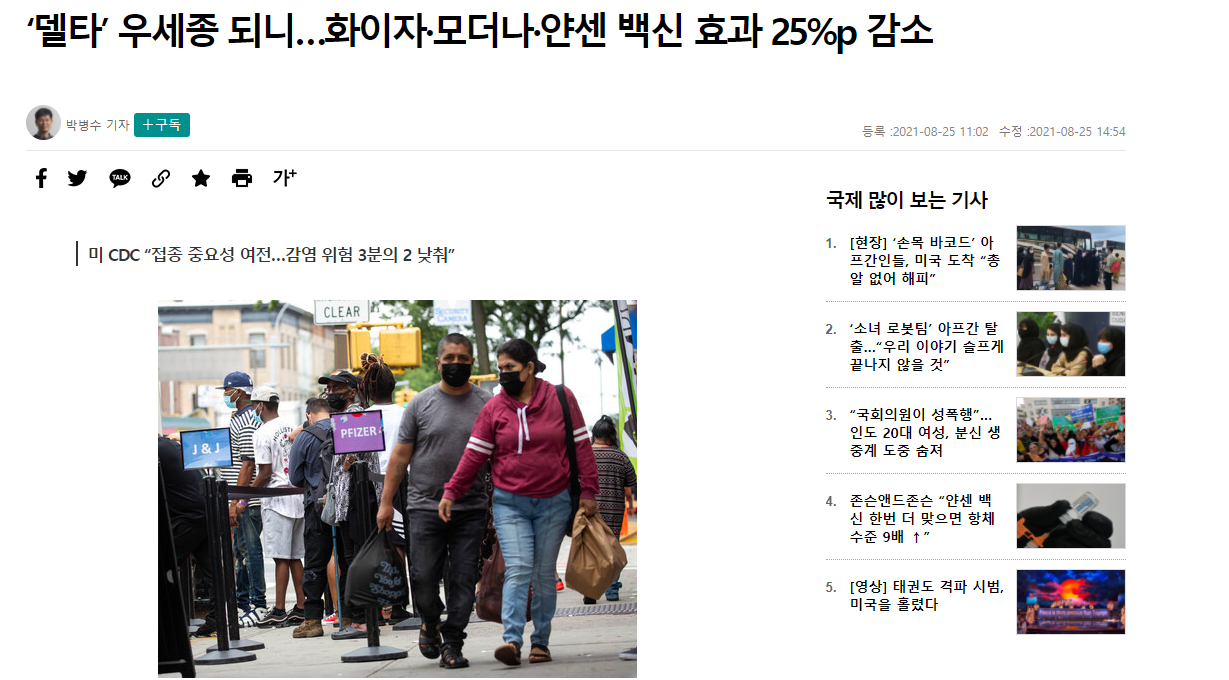

# 델타변이를 하나의 변수로 예상
 >> 접종했다고 안심하고 바깥활동을 지속하기 보단 여전히 위험하므로 
    격리활동을 철저히 해야할 필요성이 있어보임

In [115]:
df1.columns

Index(['일자', '국내발생', '해외유입', '신규_확진자_수'], dtype='object')

In [171]:
df1[['국내발생','해외유입']]

,국내발생,해외유입
0,1999,51
1,1811,66
2,1588,38
3,1369,48
4,1468,39
5,2113,41
6,1829,53


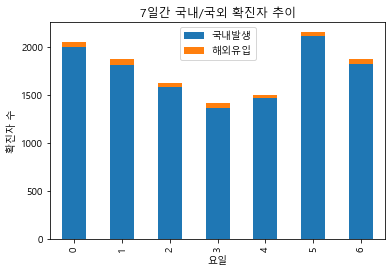

In [187]:
#누적막대 그래프
#생각보다 
df1[['국내발생','해외유입']].plot(kind='bar', stacked=True)
plt.title('7일간 국내/국외 확진자 추이')
plt.xlabel('요일')
plt.ylabel('확진자 수')

plt.show()

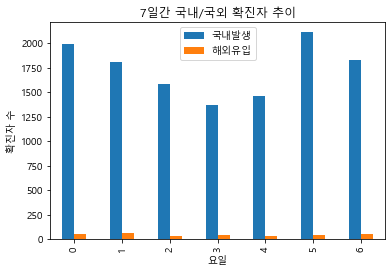

In [188]:
#이렇게 보면 국내와 해외유입간 상대적인 차이만 눈에 띔
df1[['국내발생','해외유입']].plot(kind='bar', stacked=False)
plt.title('7일간 국내/국외 확진자 추이')
plt.xlabel('요일')
values = ['월요일','화요일','수요일','목요일','금요일','토요일', '일요일']
plt.ylabel('확진자 수')

plt.show()


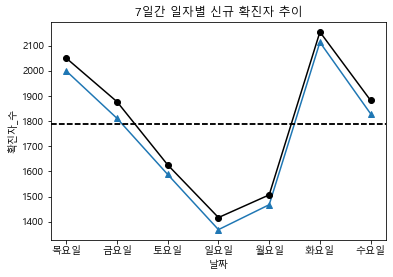

In [216]:
#국내 확진자
plt.plot(df1['일자'],df1['국내발생'], marker='^')
plt.title('7일간 국내 확진자 추이')
plt.xlabel('요일')
plt.ylabel('확진자 수')
values = ['목요일','금요일','토요일', '일요일','월요일','화요일','수요일']
plt.xticks(df1['일자'],values)
plt.axhline(y= df1['신규_확진자_수'].mean(), linestyle='--', color='black', label=" 신규 확진자 수 평균")

#총 신규확진자 수
plt.plot(df1['일자'], df1['신규_확진자_수'], color='black', marker='o')
plt.title('7일간 일자별 신규 확진자 추이')
plt.axhline(y= df1['신규_확진자_수'].mean(), linestyle='--', color='black', label="평균")
plt.xlabel('날짜')
plt.ylabel('확진자_수')

plt.show()
#해외유입 확진자 수는 현저히 적다는 것을 확인할 수 있음
#왜?
#국내

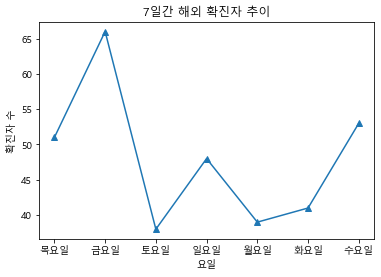

In [242]:
#해외유입의 경우 생각보다 주말에 오히려 증가폭이 적었음
plt.plot(df1['일자'],df1['해외유입'], marker='^')
plt.title('7일간 해외 확진자 추이')
plt.xlabel('요일')
plt.ylabel('확진자 수')
values = ['목요일','금요일','토요일', '일요일','월요일','화요일','수요일']
plt.xticks(df1['일자'],values)

plt.show()

# 해외유입한 확진자의 경우
 
  >> 해외 유입의 경우 독특하게도 주말이 평일보다 적었다

# 결론
 
 >> 델타변이로 인해 위험성이 높으니 접종했어도 거리두기에 
    신경쓰는것이 좋아보입니다.